# Use synthetic data to test the beamforming code

In [9]:
# Imports

from os.path import join
from matplotlib.pyplot import subplots
from matplotlib.dates import DateFormatter
from matplotlib.dates import MinuteLocator, SecondLocator
from matplotlib.patches import Rectangle
from matplotlib.ticker import MultipleLocator
from pandas import Timestamp, Timedelta
from numpy import log10, sqrt
from obspy.core.util import AttribDict

from utils_basic import ROOTDIR_HYDRO, ROOTDIR_GEO, GEO_COMPONENTS, VELOCITY_UNIT, get_geophone_locs
from utils_preproc import read_and_process_windowed_geo_waveforms, read_and_process_windowed_hydro_waveforms
from utils_array import get_beam_images, get_synthetic_array_data, get_synthetic_stations

In [10]:
# Input
shape = "hexagon"
source = "cosine"
radius = 6.0

xslow = 0.0015
yslow = 0.0015

freq = 75.0
std = 0.01

scale = 0.5

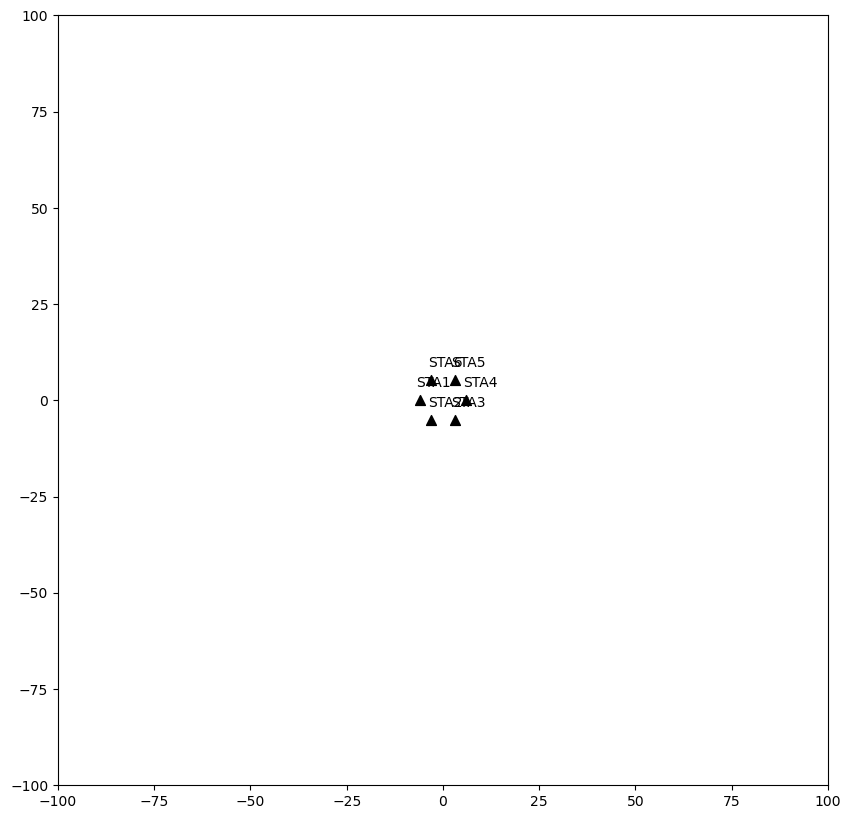

In [11]:
# Generate and plot the stations
stacoords = get_synthetic_stations(radius, shape=shape)    
fig, ax = subplots(1, 1, figsize=(10, 10))

for station, (x, y) in stacoords.items():
    ax.scatter(x, y, s=50, c="k", marker="^")
    ax.annotate(f"{station}", (x, y), textcoords="offset points", xytext=(10, 10), ha="center")

ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_aspect("equal")

In [12]:
# Generate the synthetic array data
if source == "gauss":
    stream = get_synthetic_array_data(xslow, yslow, stacoords, source=source, std=std)
else:
    stream = get_synthetic_array_data(xslow, yslow, stacoords, source=source, freq=freq)

(0.0, 1.0)

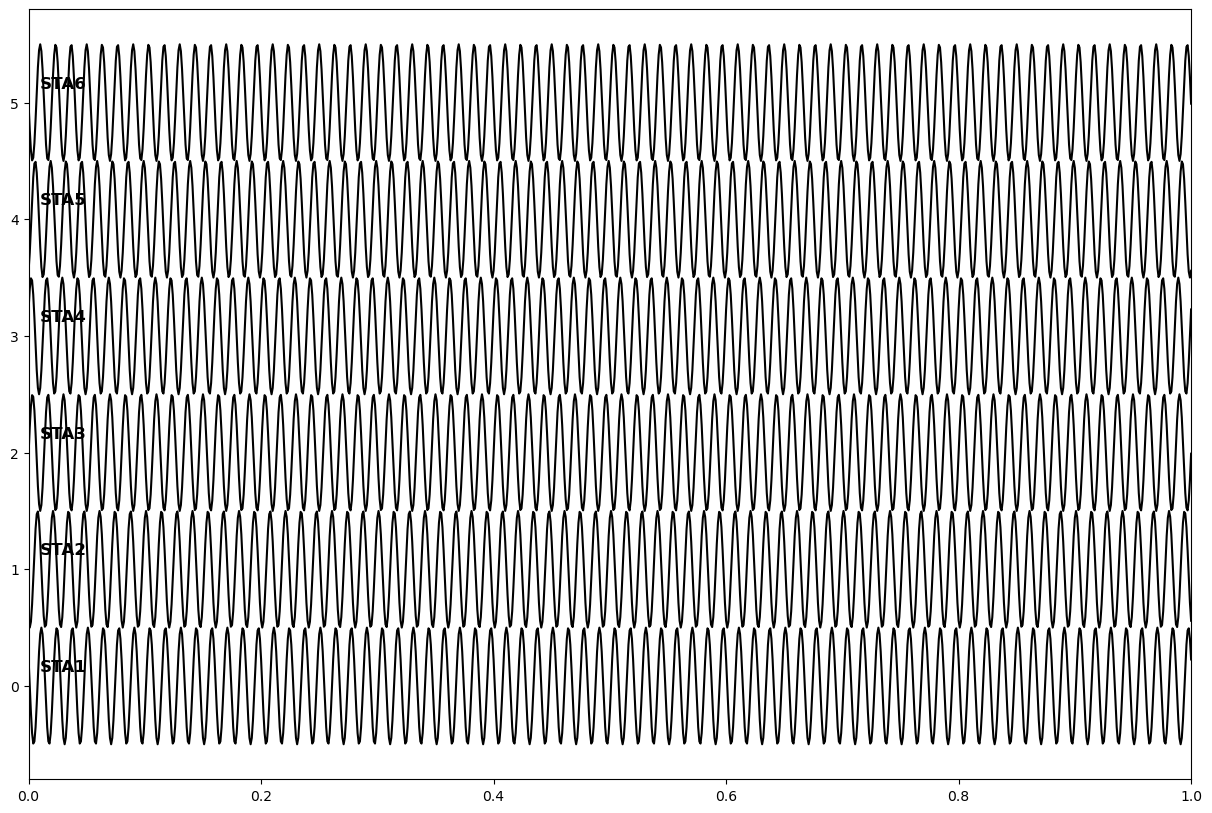

In [13]:
# Plot the data
fig, ax = subplots(1, 1, figsize=(15, 10))
for i, trace in enumerate(stream):
    data = trace.data
    timeax = trace.times()
    station = trace.stats.station

    ax.plot(trace.times(), data * scale + i, color="k")
    ax.text(0.01, i + 0.1, station, ha="left", va="bottom", fontsize=12, fontweight="bold")

ax.set_xlim(timeax[0], timeax[-1])

Beamforming Z component...


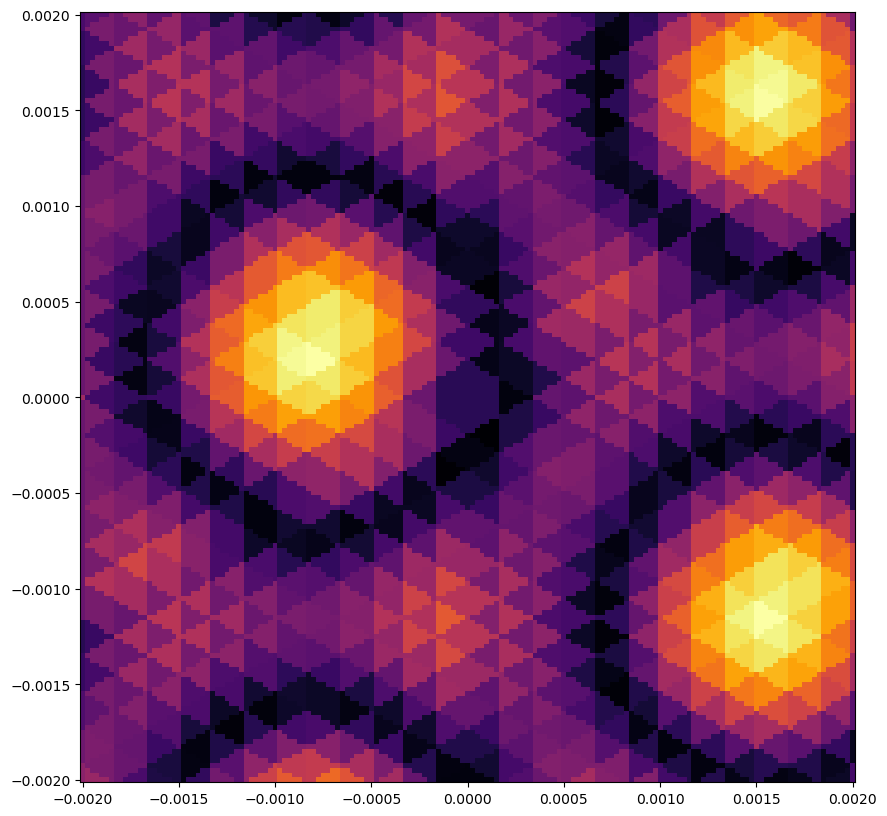

In [14]:
# Compute and plot the beam images
xslow, yslow, bimage = get_beam_images(stream, numslow=161)

fig, ax = subplots(1, 1, figsize=(10, 10))
ax.pcolormesh(xslow, yslow, bimage, cmap="inferno", shading="auto")

In [15]:
print(bimage)

[[0.37852555 0.41511409 0.41511409 ... 0.07307848 0.07307848 0.2083606 ]
 [0.37852555 0.41511409 0.41511409 ... 0.07307848 0.07307848 0.2083606 ]
 [0.37852555 0.41511409 0.33635489 ... 0.05611444 0.07307848 0.2083606 ]
 ...
 [0.22247966 0.25832666 0.33629322 ... 0.60954733 0.45598981 0.31516273]
 [0.22247966 0.25832666 0.25832666 ... 0.45598981 0.45598981 0.31516273]
 [0.22247966 0.25832666 0.25832666 ... 0.45598981 0.45598981 0.31516273]]


In [16]:
1 / (0.002*sqrt(2))

353.5533905932737